In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets._samples_generator import make_blobs,make_circles
from sklearn.cluster import Birch
from sklearn.metrics import calinski_harabasz_score

　　　　1) threshold:即叶节点每个CF的最大样本半径阈值T，它决定了每个CF里所有样本形成的超球体的半径阈值。一般来说threshold越小，则CF Tree的建立阶段的规模会越大，即BIRCH算法第一阶段所花的时间和内存会越多。但是选择多大以达到聚类效果则需要通过调参决定。默认值是0.5.如果样本的方差较大，则一般需要增大这个默认值。  

　　　　2) branching_factor：即CF Tree内部节点的最大CF数B，以及叶子节点的最大CF数L。这里scikit-learn对这两个参数进行了统一取值。也就是说，branching_factor决定了CF Tree里所有节点的最大CF数。默认是50。如果样本量非常大，比如大于10万，则一般需要增大这个默认值。选择多大的branching_factor以达到聚类效果则需要通过和threshold一起调参  决定

　　　　3）n_clusters：即类别数K，在BIRCH算法是可选的，如果类别数非常多，我们也没有先验知识，则一般输入None，此时BIRCH算法第4阶段不会运行。但是如果我们有类别的先验知识，则推荐输入这个可选的类别值。默认是3，即最终聚  为3类。

　　　　4）compute_labels：布尔值，表示是否标示类别输出，默认是True。一般使用默认值挺好，这样可以看  到聚类效果。

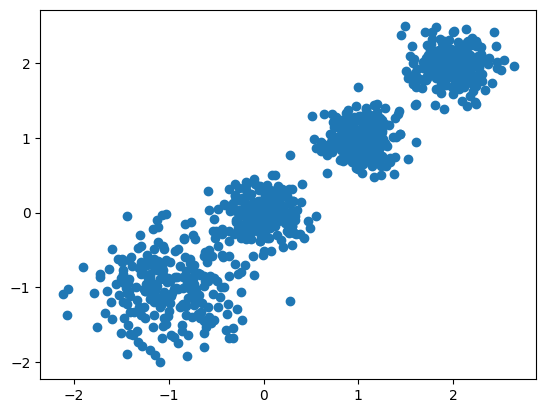

In [2]:
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                  cluster_std=[0.4, 0.2, 0.2, 0.2], random_state=9)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

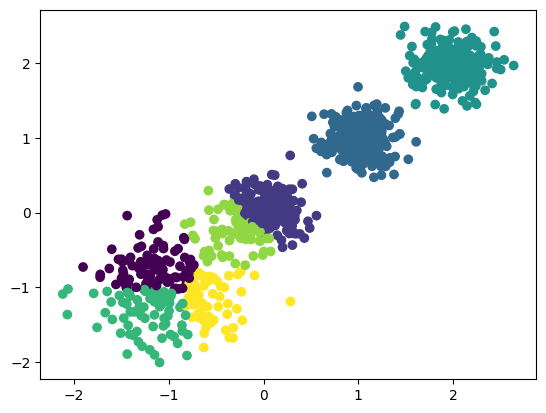

Calinski-Harabasz Score 4549.2403009325


In [3]:
y_pred = Birch(n_clusters = None).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

print("Calinski-Harabasz Score", calinski_harabasz_score(X, y_pred))

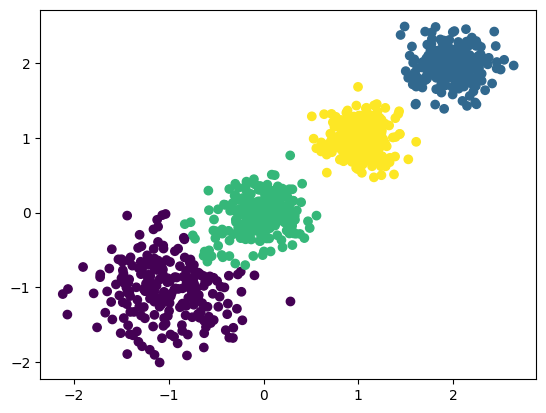

Calinski-Harabasz Score 5835.697712242124


In [4]:
y_pred = Birch(n_clusters = 4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
print("Calinski-Harabasz Score", calinski_harabasz_score(X, y_pred))

和k-means得分差不多

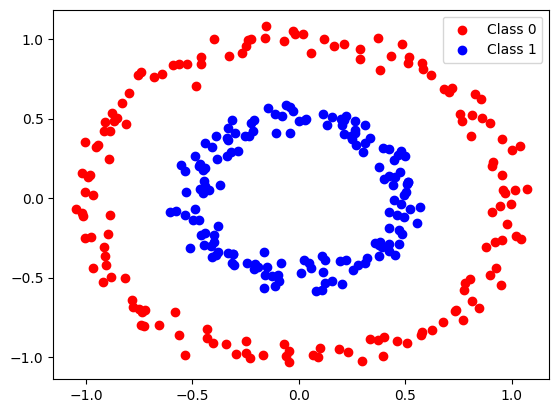

In [7]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# 绘制生成的数据
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Class 1')

plt.legend()
plt.show()

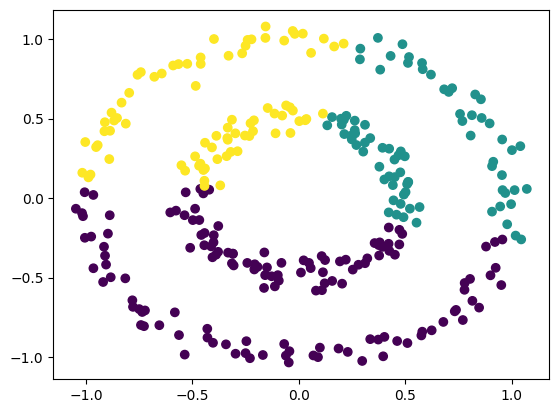

In [10]:
y_pred = Birch().fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()